# Team 3 - Merchant Category Recommendation
## Feature Extraction

### Team 3
- Vinicio De Sola
- Kevin Hanna
- Pri Nonis
- Bradley Nott

The results from Feature Engineering should get cleaned up here before modeling. 

In [1]:
import numpy               as np
import matplotlib.pyplot   as plt
import pandas              as pd
import seaborn             as sb

from datetime              import timedelta, datetime

from sklearn               import metrics
from sklearn.decomposition import PCA
from sklearn.cluster       import KMeans
from sklearn.mixture       import GaussianMixture
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import KFold

from matplotlib.colors     import LogNorm

from IPython.display       import HTML, Markdown

from sklearn.metrics       import mean_squared_error

import lightgbm as lgb

%matplotlib inline

np.random.seed(0)

import os
print(os.listdir("./input"))

['historical_transactions.csv', '.ipynb_checkpoints', 'new_merchant_transactions.csv', 'engineered_test.pkl', '.~lock.Data_Dictionary.xlsx#', 'merchants.csv', 'sample_submission.csv', 'foo.csv', 'test.csv', 'Data_Dictionary.xlsx', 'engineered_train.pkl', '.gitignore', 'train.csv']


## Read in all the data files

In [2]:
train        = pd.read_pickle('input/engineered_train.pkl')
test         = pd.read_pickle('input/engineered_test.pkl')

target = train['target']
del      train['target']

## A view of our new training data dataframe

In [3]:
display(train.head())
display(test.head())

feature_3  first_active_delta_days  feature_1_1  feature_1_2  \
card_id                                                                         
C_ID_92a2005557          1                      246            0            0   
C_ID_3d0044924f          0                      397            0            0   
C_ID_d639edf6cd          0                      550            0            1   
C_ID_186d6a6901          0                      154            0            0   
C_ID_cdbd2c0db2          0                       93            1            0   

                 feature_1_3  feature_1_4  feature_1_5  feature_2_1  \
card_id                                                               
C_ID_92a2005557            0            0            1            0   
C_ID_3d0044924f            0            1            0            1   
C_ID_d639edf6cd            0            0            0            0   
C_ID_186d6a6901            0            1            0            0   
C_ID_cdbd2c0db2            0            0            0            0   

                 feature_2_2  feature_2_3  \
card_id                                     
C_ID_92a2005557            1            0   
C_ID_3d0044924f            0            0   
C_ID_d639edf6cd            1            0   
C_ID_186d6a6901            0            1   
C_ID_cdbd2c0db2            0            1   

                                      ...                         \
card_id                               ...                          
C_ID_92a2005557                       ...                          
C_ID_3d0044924f                       ...                          
C_ID_d639edf6cd                       ...                          
C_ID_186d6a6901                       ...                          
C_ID_cdbd2c0db2                       ...                          

                 new_most_recent_sales_range_A_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          7.0   
C_ID_3d0044924f                                          1.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          0.0   
C_ID_cdbd2c0db2                                          7.0   

                 new_most_recent_sales_range_B_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          1.0   
C_ID_3d0044924f                                          2.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          1.0   
C_ID_cdbd2c0db2                                          3.0   

                 new_most_recent_sales_range_C_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          7.0   
C_ID_3d0044924f                                          0.0   
C_ID_d639edf6cd                                          1.0   
C_ID_186d6a6901                                          1.0   
C_ID_cdbd2c0db2                                         10.0   

                 new_most_recent_sales_range_D_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          5.0   
C_ID_3d0044924f                                          3.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                                          5.0   
C_ID_cdbd2c0db2                                         13.0   

                 new_most_recent_sales_range_E_merchants_sum  \
card_id                                                        
C_ID_92a2005557                                          3.0   
C_ID_3d0044924f                                          0.0   
C_ID_d639edf6cd                                          0.0   
C_ID_186d6a6901                           

first_active_month  feature_3  first_active_delta_days  \
card_id                                                                  
C_ID_0ab67a22ab         2017-04-01          1                      307   
C_ID_130fd0cbdd         2017-01-01          0                      397   
C_ID_b709037bc5         2017-08-01          1                      185   
C_ID_d27d835a9f         2017-12-01          0                       63   
C_ID_2b5e3df5c2         2015-12-01          1                      794   

                 feature_1_1  feature_1_2  feature_1_3  feature_1_4  \
card_id                                                               
C_ID_0ab67a22ab            0            0            1            0   
C_ID_130fd0cbdd            0            1            0            0   
C_ID_b709037bc5            0            0            0            0   
C_ID_d27d835a9f            0            1            0            0   
C_ID_2b5e3df5c2            0            0            0            0   

                 feature_1_5  feature_2_1  feature_2_2  \
card_id                                                  
C_ID_0ab67a22ab            0            0            0   
C_ID_130fd0cbdd            0            0            0   
C_ID_b709037bc5            1            1            0   
C_ID_d27d835a9f            0            1            0   
C_ID_2b5e3df5c2            1            1            0   

                                      ...                         \
card_id                               ...                          
C_ID_0ab67a22ab                       ...                          
C_ID_130fd0cbdd                       ...                          
C_ID_b709037bc5                       ...                          
C_ID_d27d835a9f                       ...                          
C_ID_2b5e3df5c2                       ...                          

                 new_most_recent_sales_range_A_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          2.0   
C_ID_b709037bc5                                          1.0   
C_ID_d27d835a9f                                          5.0   
C_ID_2b5e3df5c2                                          0.0   

                 new_most_recent_sales_range_B_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          0.0   
C_ID_b709037bc5                                          1.0   
C_ID_d27d835a9f                                          4.0   
C_ID_2b5e3df5c2                                          1.0   

                 new_most_recent_sales_range_C_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          1.0   
C_ID_130fd0cbdd                                          3.0   
C_ID_b709037bc5                                          0.0   
C_ID_d27d835a9f                                          1.0   
C_ID_2b5e3df5c2                                          1.0   

                 new_most_recent_sales_range_D_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          2.0   
C_ID_130fd0cbdd                                          1.0   
C_ID_b709037bc5                                          0.0   
C_ID_d27d835a9f                                          0.0   
C_ID_2b5e3df5c2                                          3.0   

                 new_most_recent_sales_range_E_merchants_sum  \
card_id                                                        
C_ID_0ab67a22ab                                          0.0   
C_ID_130fd0cbdd                                          4.0   
C_ID_b709037bc5                                          0.0   

# Feature Extraction
Analyze and select features for modeling
https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [4]:
# Store results
feature_score_df = pd.DataFrame()

param = {
    'num_leaves':100, 
    'num_trees':100, 
    'objective':'regression',
    'metric': 'rmse',
    "verbosity": -1}

folds = KFold(n_splits=2, shuffle=True, random_state=15)
for fold_, (train_index, validation_idex) in enumerate(folds.split(train.values, target.values)):

    train_data_fold = lgb.Dataset(train.iloc[train_index], label=target.iloc[train_index])
    validation_data_fold = lgb.Dataset(train.iloc[validation_idex], label=target.iloc[validation_idex])

    num_round = 10000
    clf = lgb.train(param,
                    train_data_fold,
                    num_round,
                    valid_sets = [train_data_fold, validation_data_fold],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    # here are the best coeffecients for the round
    print(clf.predict(train.iloc[validation_idex], num_iteration=clf.best_iteration))

/home/khanna/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 2.80121	valid_1's rmse: 3.70582
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2.80121	valid_1's rmse: 3.70582
[ 0.02319679 -1.76812719 -0.15018817 ...  0.0467003   0.01933514
 -0.3549383 ]


/home/khanna/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 2.7423	valid_1's rmse: 3.76876
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 2.7423	valid_1's rmse: 3.76876
[-0.21232262 -0.34146862  0.65760116 ...  0.81831922 -3.42696857
 -0.52447152]


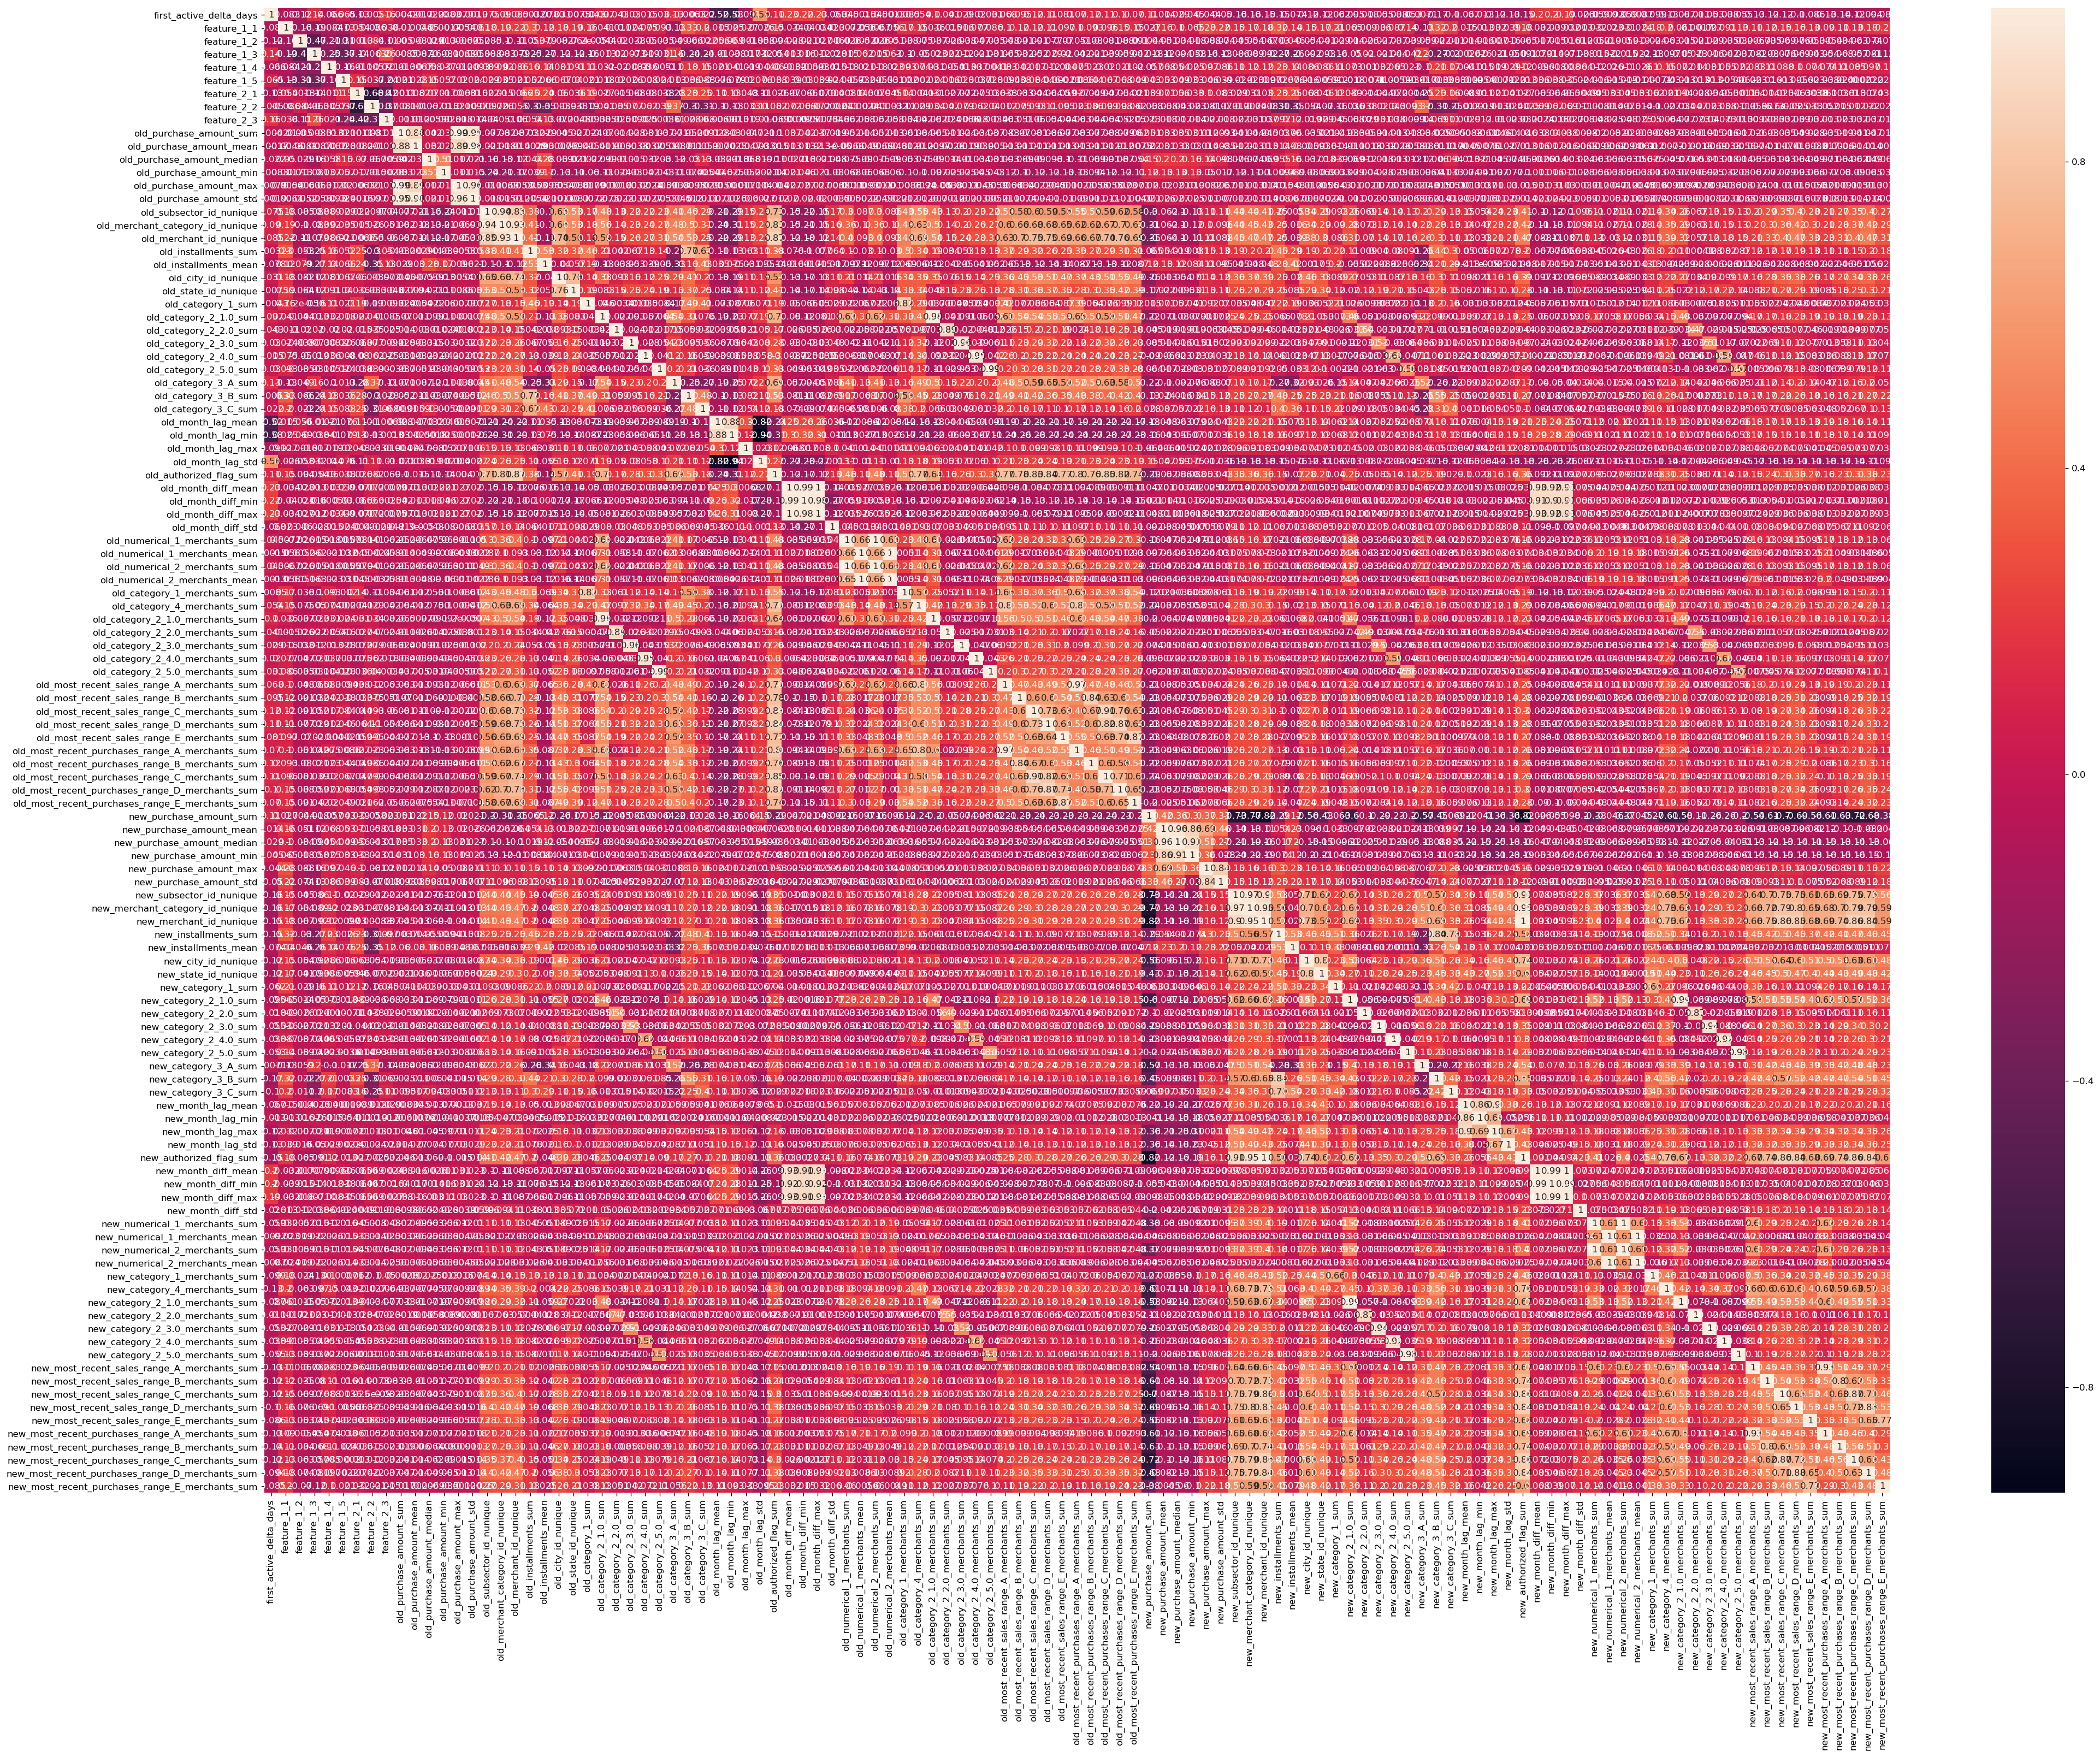

In [5]:
train_sm = train[train.columns[1:]][:5000]
corr = train_sm.corr()
plt.figure(num=None, figsize=(40,30), dpi=120, facecolor='w', edgecolor='k')
sb.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True
          )

# Note the strong negative correlations to new_purchase_amount_sum. 
# I suspect this is because of the zero filled values when we joined
# train with transactions_new (which don't line up 1:1)

# When we reduce features this will be less ugly again

In [6]:
train_sm = train[train.columns[1:]][:10]
cov = np.cov(train_sm, ddof=1)
display(pd.DataFrame(cov))

# train_sm.to_csv('input/foo.csv')



0             1            2             3             4  \
0  283498.277413  6.837176e+05  4316.938663  25294.793478  31365.336577   
1  683717.586208  1.700940e+06  9476.780416  62996.390882  77440.410139   
2    4316.938663  9.476780e+03  2786.566251   1069.006432    816.274416   
3   25294.793478  6.299639e+04  1069.006432   2786.374715   3417.596534   
4   31365.336577  7.744041e+04   816.274416   3417.596534   4469.717112   
5   25402.722479  6.146029e+04  2773.647033   2940.485562   3239.864377   
6    7597.397801  1.560267e+04  2591.559195   1452.169846   1430.284698   
7     695.736286  1.212308e+03   778.520818    280.822573    211.353195   
8     215.235002  2.295639e+02   898.255108    262.093419    170.945798   
9   25251.937751  6.029719e+04  3043.449017   3015.581501   3212.370873   

              5             6            7           8             9  
0  25402.722479   7597.397801   695.736286  215.235002  25251.937751  
1  61460.285605  15602.666506  1212.308237  229.563872  60297.188789  
2   2773.647033   2591.559195   778.520818  898.255108   3043.449017  
3   2940.485562   1452.169846   280.822573  262.093419   3015.581501  
4   3239.864377   1430.284698   211.353195  170.945798   3212.370873  
5   4548.494884   2442.596053   724.964606  841.564595   4576.911564  
6   2442.596053   4723.400512   764.593115  718.135766   3267.164579  
7    724.964606    764.593115   235.357900  253.716043    852.729775  
8    841.564595    718.135766   253.716043  308.964671    908.473203  
9   4576.911564   3267.164579   852.729775  908.473203   5138.389161

## Train and test model using ALL engineered features 

In [7]:
print(len(train.columns))
for col in train.columns:
    print("'{}',".format(col))

114
'feature_3',
'first_active_delta_days',
'feature_1_1',
'feature_1_2',
'feature_1_3',
'feature_1_4',
'feature_1_5',
'feature_2_1',
'feature_2_2',
'feature_2_3',
'old_purchase_amount_sum',
'old_purchase_amount_mean',
'old_purchase_amount_median',
'old_purchase_amount_min',
'old_purchase_amount_max',
'old_purchase_amount_std',
'old_subsector_id_nunique',
'old_merchant_category_id_nunique',
'old_merchant_id_nunique',
'old_installments_sum',
'old_installments_mean',
'old_city_id_nunique',
'old_state_id_nunique',
'old_category_1_sum',
'old_category_2_1.0_sum',
'old_category_2_2.0_sum',
'old_category_2_3.0_sum',
'old_category_2_4.0_sum',
'old_category_2_5.0_sum',
'old_category_3_A_sum',
'old_category_3_B_sum',
'old_category_3_C_sum',
'old_month_lag_mean',
'old_month_lag_min',
'old_month_lag_max',
'old_month_lag_std',
'old_authorized_flag_sum',
'old_month_diff_mean',
'old_month_diff_min',
'old_month_diff_max',
'old_month_diff_std',
'old_numerical_1_merchants_sum',
'old_numerical_1_merchant

## Test area to play with different sets of features

In [8]:
def feature_play():
    np.random.seed(0)
    #This is just to play around with different engineered features. 

    
    train_selecte_features = train[[
        'feature_3',
        'first_active_delta_days',
        'feature_1_1',
        'feature_1_2',
        'feature_1_3',
        'feature_1_4',
        'feature_1_5',
        'feature_2_1',
        'feature_2_2',
        'feature_2_3',
        'old_purchase_amount_sum',
        'old_purchase_amount_mean',
        'old_purchase_amount_median',
        'old_purchase_amount_min',
        'old_purchase_amount_max',
        'old_purchase_amount_std',
        'old_subsector_id_nunique',
        'old_merchant_category_id_nunique',
        'old_merchant_id_nunique',
        'old_installments_sum',
        'old_installments_mean',
        'old_city_id_nunique',
        'old_state_id_nunique',
        'old_category_1_sum',
        'old_category_2_1.0_sum',
        'old_category_2_2.0_sum',
        'old_category_2_3.0_sum',
        'old_category_2_4.0_sum',
        'old_category_2_5.0_sum',
        'old_category_3_A_sum',
        'old_category_3_B_sum',
        'old_category_3_C_sum',
        'old_month_lag_mean',
        'old_month_lag_min',
        'old_month_lag_max',
        'old_month_lag_std',
        'old_authorized_flag_sum',
        'old_month_diff_mean',
        'old_month_diff_min',
        'old_month_diff_max',
        'old_month_diff_std',
        'old_numerical_1_merchants_sum',
        'old_numerical_1_merchants_mean',
        'old_numerical_2_merchants_sum',
        'old_numerical_2_merchants_mean',
        'old_category_1_merchants_sum',
        'old_category_4_merchants_sum',
        'old_category_2_1.0_merchants_sum',
        'old_category_2_2.0_merchants_sum',
        'old_category_2_3.0_merchants_sum',
        'old_category_2_4.0_merchants_sum',
        'old_category_2_5.0_merchants_sum',
        'old_most_recent_sales_range_A_merchants_sum',
        'old_most_recent_sales_range_B_merchants_sum',
        'old_most_recent_sales_range_C_merchants_sum',
        'old_most_recent_sales_range_D_merchants_sum',
        'old_most_recent_sales_range_E_merchants_sum',
        'old_most_recent_purchases_range_A_merchants_sum',
        'old_most_recent_purchases_range_B_merchants_sum',
        'old_most_recent_purchases_range_C_merchants_sum',
        'old_most_recent_purchases_range_D_merchants_sum',
        'old_most_recent_purchases_range_E_merchants_sum',
        'new_purchase_amount_sum',
        'new_purchase_amount_mean',
        'new_purchase_amount_median',
        'new_purchase_amount_min',
        'new_purchase_amount_max',
        'new_purchase_amount_std',
        'new_subsector_id_nunique',
        'new_merchant_category_id_nunique',
        'new_merchant_id_nunique',
        'new_installments_sum',
        'new_installments_mean',
        'new_city_id_nunique',
        'new_state_id_nunique',
        'new_category_1_sum',
        'new_category_2_1.0_sum',
        'new_category_2_2.0_sum',
        'new_category_2_3.0_sum',
        'new_category_2_4.0_sum',
        'new_category_2_5.0_sum',
        'new_category_3_A_sum',
        'new_category_3_B_sum',
        'new_category_3_C_sum',
        'new_month_lag_mean',
        'new_month_lag_min',
        'new_month_lag_max',
        'new_month_lag_std',
        'new_authorized_flag_sum',
        'new_month_diff_mean',
        'new_month_diff_min',
        'new_month_diff_max',
        'new_month_diff_std',
        'new_numerical_1_merchants_sum',
        'new_numerical_1_merchants_mean',
        'new_numerical_2_merchants_sum',
        'new_numerical_2_merchants_mean',
        'new_category_1_merchants_sum',
        'new_category_4_merchants_sum',
        'new_category_2_1.0_merchants_sum',
        'new_category_2_2.0_merchants_sum',
        'new_category_2_3.0_merchants_sum',
        'new_category_2_4.0_merchants_sum',
        'new_category_2_5.0_merchants_sum',
        'new_most_recent_sales_range_A_merchants_sum',
        'new_most_recent_sales_range_B_merchants_sum',
        'new_most_recent_sales_range_C_merchants_sum',
        'new_most_recent_sales_range_D_merchants_sum',
        'new_most_recent_sales_range_E_merchants_sum',
        'new_most_recent_purchases_range_A_merchants_sum',
        'new_most_recent_purchases_range_B_merchants_sum',
        'new_most_recent_purchases_range_C_merchants_sum',
        'new_most_recent_purchases_range_D_merchants_sum',
        'new_most_recent_purchases_range_E_merchants_sum'
    ]]
    
    
    data_len = len(train)
    mask = np.random.rand(data_len) < 0.8

    train_data = train_selecte_features.values[mask]
    train_labels = target.values.flatten()[mask]
    test_data = train_selecte_features.values[~mask]
    test_labels = target.values.flatten()[~mask]

    X = train_data
    y = train_labels

    X_test = test_data
    y_test = test_labels

    reg = LinearRegression()
    reg.fit(X, y)

    y_pred_reg = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_reg)

    y_mean = train_labels.mean()
    y_test_mean = test_labels.mean()

    print("Using the following features, the Mean Squared Error is: {:0.3f}".format(mse))
    print(train_selecte_features.columns)
    
    return mse

# if play_mse:
#     print("Previous MSE: {:0.3f}".format(play_mse))
    
play_mse = feature_play()

Using the following features, the Mean Squared Error is: 15.133
Index(['feature_3', 'first_active_delta_days', 'feature_1_1', 'feature_1_2',
       'feature_1_3', 'feature_1_4', 'feature_1_5', 'feature_2_1',
       'feature_2_2', 'feature_2_3',
       ...
       'new_most_recent_sales_range_A_merchants_sum',
       'new_most_recent_sales_range_B_merchants_sum',
       'new_most_recent_sales_range_C_merchants_sum',
       'new_most_recent_sales_range_D_merchants_sum',
       'new_most_recent_sales_range_E_merchants_sum',
       'new_most_recent_purchases_range_A_merchants_sum',
       'new_most_recent_purchases_range_B_merchants_sum',
       'new_most_recent_purchases_range_C_merchants_sum',
       'new_most_recent_purchases_range_D_merchants_sum',
       'new_most_recent_purchases_range_E_merchants_sum'],
      dtype='object', length=114)
